<br>
  <font size = 12 color = Darkblue >
        <span style='font-family:Candra'>
        <center>
            <b>Bike Sharing Assignment</b>
        </center>
        </span>   
    </font>    
<br>

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Background
            </span>   
        </font>    
</h2>
<p>
    <span style='font-family:Candra'>
    A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
    </span>
</p>   
<hr>
<h2>
     <font color = Darkblue >
            <span style='font-family:Candra'>
            Problem Statement
            </span>   
        </font>    
</h2>
<p>
   <span style='font-family:Candra'>
    A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.<br>
<br>     
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.<br>
 <br>      
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:<br>
    </span>
</p>
<ol>
    <span style='font-family:Candra'> 
        <li> Which variables are significant in predicting the demand for shared bikes. </li>
        <li>How well those variables describe the bike demand</li>
    </span>

<p>
    <span style='font-family:Candra'> 
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.        
    </span> 
</p>
<hr>
<h2>
 <font color = Darkblue >
        <span style='font-family:Candra'>
        Business Goal
        </span>   
    </font>    
</h2>
<p>
    <span style='font-family:Candra'>
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 
    </span>
</p> 


<h2>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Importing necessary libraries
        </span>    
    </font>
</h2> 

In [728]:
# Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [729]:
# Dataframe libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

In [730]:
# Visulisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Understanding the data
        </span>    
    </font>
</h1>

In [731]:
# Read dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Inspecting the Dataframe
            </span>   
        </font>    
</h2>

In [732]:
bike.shape

(730, 16)

In [733]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [734]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [735]:
bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [736]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [737]:
# Renaming the columns for better understanding

bike.rename(columns = {'yr':'year', 'mnth':'months', 'hum':'humidity', 'cnt':'count'}, inplace= 'True')
bike.head()

,instant,dteday,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Duplicate Checking
            </span>   
        </font>    
</h2>

In [738]:
# Checking for duplicate entries and dropping if any

bike_dup = bike

bike_dup.drop_duplicates(subset = None, inplace = None)
bike_dup.shape

# No duplicate rows found.

(730, 16)

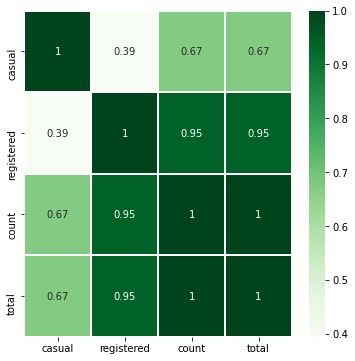

In [739]:
# Removing redundant columns
bike_cnt = bike[['casual', 'registered', 'count']]

bike_cnt['total'] = bike_cnt['casual'] + bike_cnt['registered']

plt.figure(figsize = (6,6))
ax = sns.heatmap(bike_cnt.corr(), annot = True, cmap='Greens', linewidth = 1)
plt.show()

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Removing Redundant columns
            </span>   
        </font>    
</h2>

In [740]:
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike.shape

(730, 12)

<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Visualizing the data
        </span>    
    </font>
</h1>

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Converting Categorical columns
            </span>   
        </font>    
</h2>
<br>
<span style='font-family:Candra'>
    <p>Converting season, month, weathersit and weekday to categorical columns</p>
    <ul>

In [741]:
# Season
bike.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace = True)
bike.season.value_counts(normalize = True)

Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64

In [742]:
# Months
bike.months.replace((1,2,3,4,5,6,7,8,9,10,11,12),('1Jan','2Feb','3Mar','4Apr','5May','6Jun','7Jul','8Aug','9Sep','10Oct','11Nov','12Dec'), inplace=True)
bike.months.value_counts(normalize=True)

3Mar     0.084932
1Jan     0.084932
5May     0.084932
7Jul     0.084932
12Dec    0.084932
8Aug     0.084932
10Oct    0.084932
6Jun     0.082192
9Sep     0.082192
4Apr     0.082192
11Nov    0.082192
2Feb     0.076712
Name: months, dtype: float64

In [743]:
# Weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [744]:
# Weekday
bike.weekday.replace((0,1,2,3,4,5,6), ('0Sunday','1Monday','2Tuesday','3Wednesday','4Thursday','5Friday','6Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

1Monday       0.143836
2Tuesday      0.143836
3Wednesday    0.142466
4Thursday     0.142466
0Sunday       0.142466
5Friday       0.142466
6Saturday     0.142466
Name: weekday, dtype: float64

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Categorical Variable Analysis
            </span>   
        </font>    
</h2>

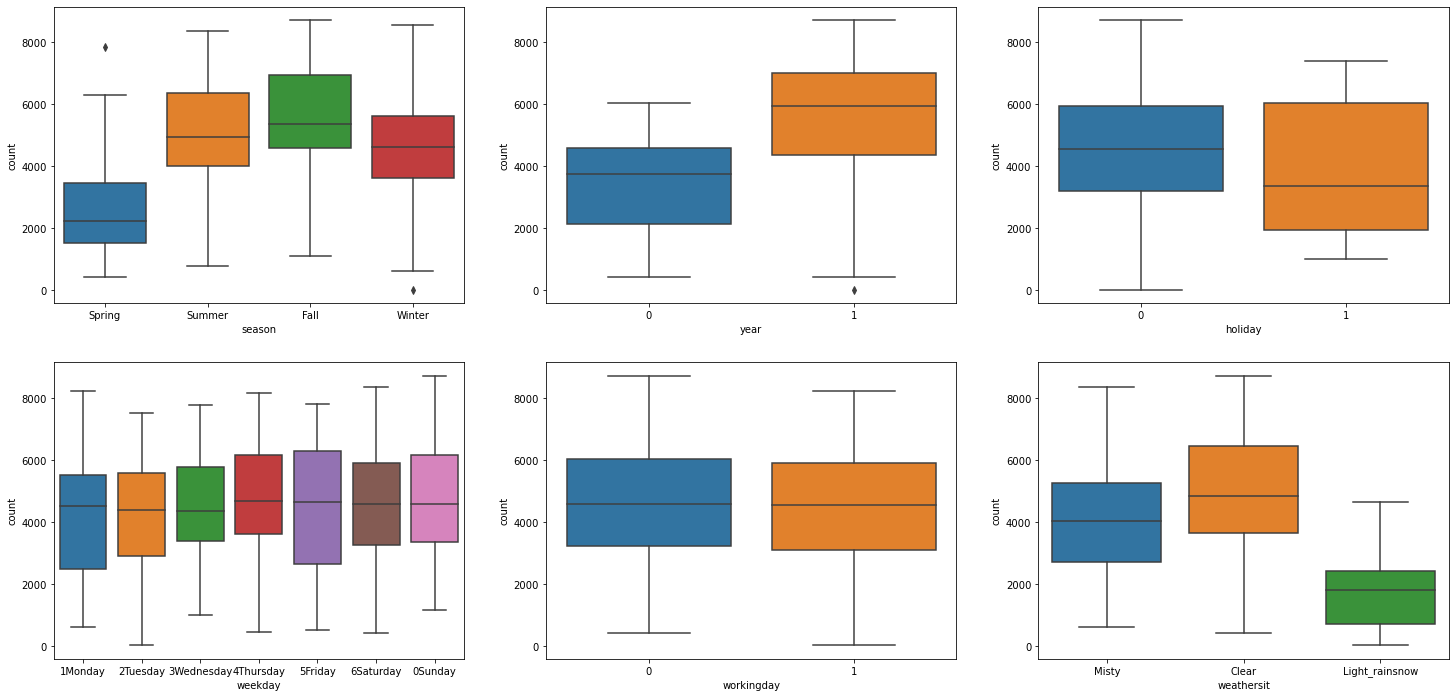

In [745]:
def boxplot_cat_var(cat_var,target):
    plt.figure(figsize=(25, 12))
    for i in range(0,len(cat_var)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x = cat_var[i], y = target, data = bike)
    plt.show()

cat_var =['season','year','holiday','weekday','workingday','weathersit']
boxplot_cat_var(cat_var,'count')

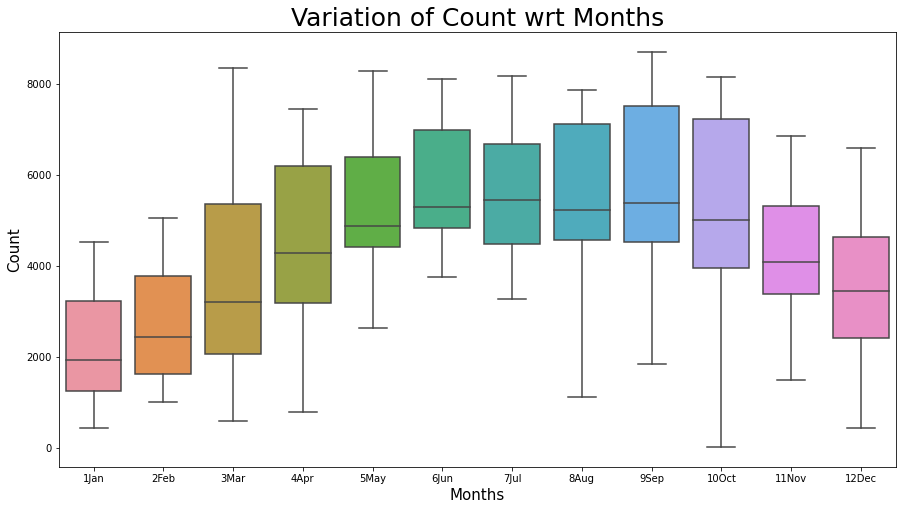

In [746]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'months', y = 'count', data = bike).set_title('Variation of Count wrt Months', fontsize = 25)
plt.xlabel("Months", fontsize = 15) 
plt.ylabel("Count", fontsize = 15) 
plt.show()

In [747]:
# Function to generate statistics for categorical variables

def cat_stats(col):
    cat_df = bike.groupby(col)['count'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike['count'].sum()*100
    cat_df['count_perc']=cat_df['count']/bike['count'].count()*100
    return round(cat_df,2)

In [748]:
# Functions to generate plots for categorical variables

def cat_plots(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col, 'count', data= bike)
    plt.subplot(1,2,2)
    sns.barplot(col, 'count', data= bike, hue = 'year', palette = 'Paired')
    plt.legend(labels=['2018', '2019'])
    return

<h3>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Season
            </span>   
        </font>    
</h3>

In [749]:
cat_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
Fall,1061129,5644.30,188,32.24,25.75
Summer,918589,4992.33,184,27.91,25.21
Winter,841613,4728.16,178,25.57,24.38
Spring,469514,2608.41,180,14.27,24.66


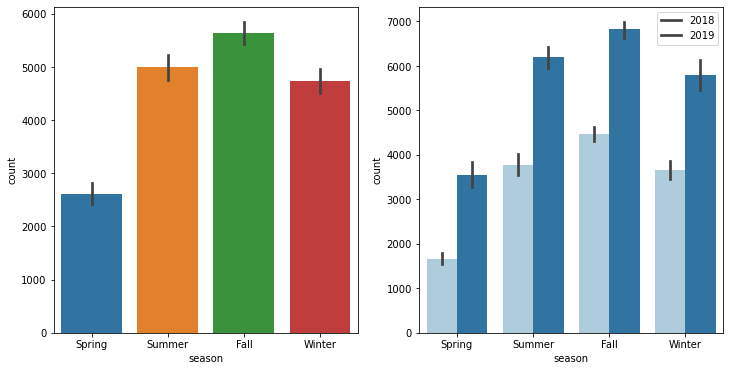

In [750]:
cat_plots('season', 12,6)

<span style='font-family:Candra'>
    <p>
        <b>Observation:</b> <br>
        Almost 32% of the bike booking were happening in Fall, followed by Summer & Winter with 27% & 25% of total booking respectively.
    </p>
</span>    
</div>

<h3>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Month
            </span>   
        </font>    
</h3>

In [751]:
cat_stats('months')

,sum,mean,count,sum_perc,count_perc
months,,,,,
8Aug,351194,5664.42,62,10.67,8.49
6Jun,346342,5772.37,60,10.52,8.22
9Sep,345991,5766.52,60,10.51,8.22
7Jul,344948,5563.68,62,10.48,8.49
5May,331686,5349.77,62,10.08,8.49
10Oct,322352,5199.23,62,9.80,8.49
4Apr,269094,4484.90,60,8.18,8.22
11Nov,254831,4247.18,60,7.74,8.22
3Mar,228920,3692.26,62,6.96,8.49


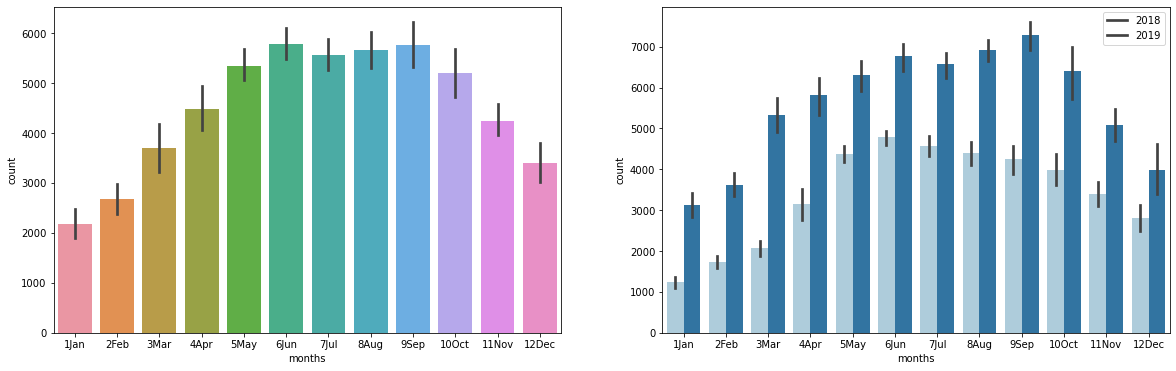

In [752]:
cat_plots('months', 20,6)


<span style='font-family:Candra'>
    <p>
        <b>Observation:</b> <br>
        Almost 10% of the bike booking was happening in the months' May to Sep.
    </p>
</span>    
</div>

<h3>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Weather
            </span>   
        </font>    
</h3>

In [753]:
cat_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


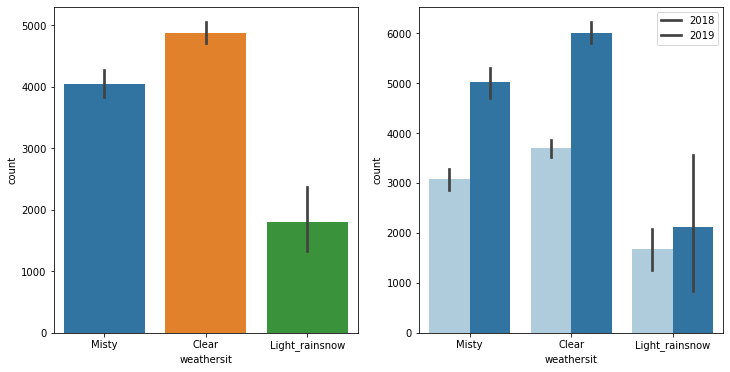

In [754]:
cat_plots('weathersit', 12,6)

<span style='font-family:Candra'>
    <p>
        <b>Observation:</b> <br>
        Almost 68.6% of the bike booking was happening during Clear weather. This was followed by Misty with 30% of the total booking. Few customers booked bike in light rainsnow weather.
    </p>
</span>    
</div>

<h3>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Weekday
            </span>   
        </font>    
</h3>

In [755]:
cat_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
4Thursday,487923,4691.57,104,14.83,14.25
0Sunday,485235,4665.72,104,14.74,14.25
6Saturday,481176,4626.69,104,14.62,14.25
5Friday,478132,4597.42,104,14.53,14.25
3Wednesday,462276,4444.96,104,14.05,14.25
2Tuesday,448822,4274.50,105,13.64,14.38
1Monday,447281,4259.82,105,13.59,14.38


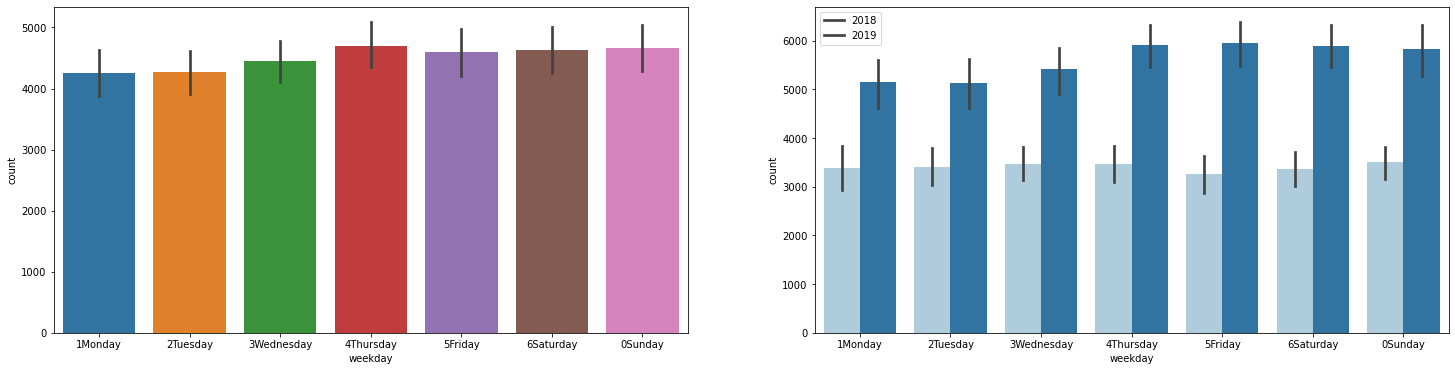

In [756]:
cat_plots('weekday',25,6)

<span style='font-family:Candra'>
    <p>
        <b>Observation:</b> <br>
        Weekly booking is almost evenly distributed in each day having almost 14% of total booking.
    </p>
</span>    
</div>

<h3>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Working Day
            </span>   
        </font>    
</h3>

In [757]:
cat_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


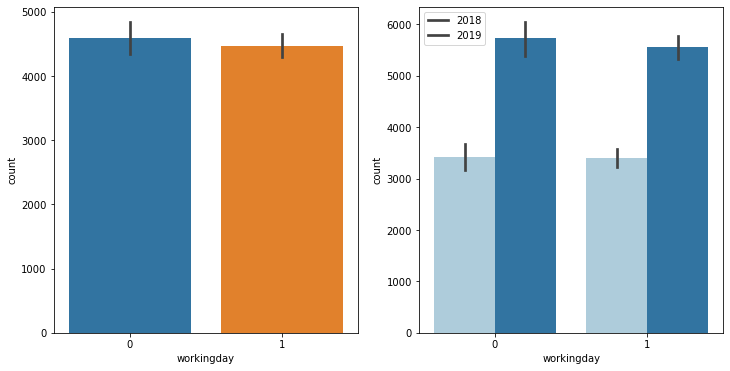

In [758]:
cat_plots('workingday', 12,6)

<span style='font-family:Candra'>
    <p>
        <b>Observation:</b> <br>
        Almost 69% of the bike booking were happening in a working day.
    </p>
</span>    
</div>

<h3>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Holiday
            </span>   
        </font>    
</h3>

In [759]:
cat_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


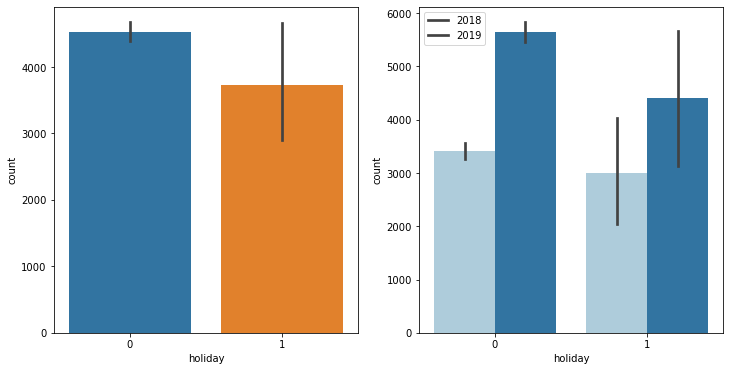

In [760]:
cat_plots('holiday', 12,6)


<span style='font-family:Candra'>
    <p>
        <b>Observation:</b> <br>
        Almost 97% of bike rentals are happening during non-holiday time.
    </p>
</span>    
</div>

<h3>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Year
            </span>   
        </font>    
</h3>

In [761]:
cat_stats('year')

,sum,mean,count,sum_perc,count_perc
year,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


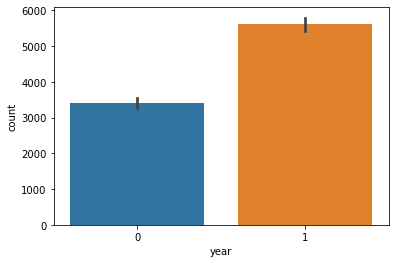

In [762]:
sns.barplot('year', 'count', data= bike)
plt.show()

<span style='font-family:Candra'>
    <p>
        <b>Observation:</b> <br>
        Bike rental demand has gone up from 2018 to 2019.
    </p>
</span>    
</div>

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Numerical Variable Analysis
            </span>   
        </font>    
</h2>

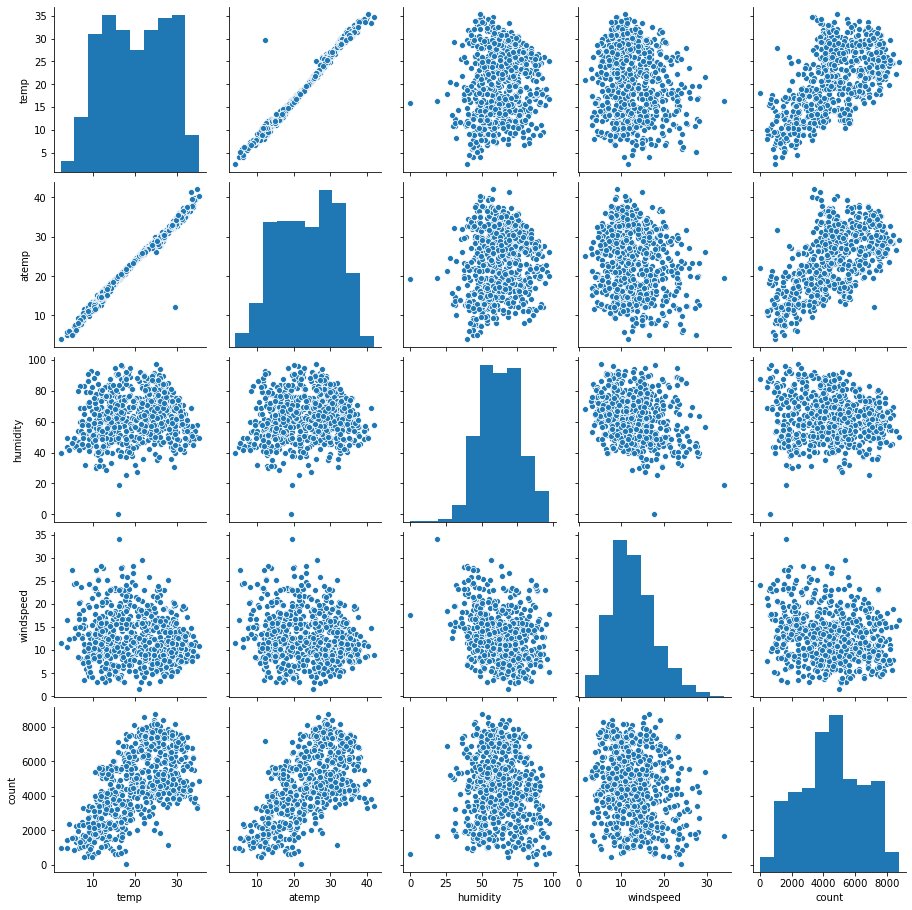

In [763]:
bike_num = bike[['temp','atemp','humidity','windspeed','count']]
sns.pairplot(bike_num)
plt.show()

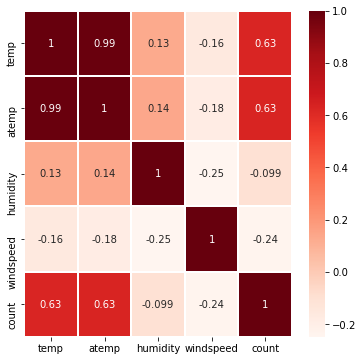

In [764]:
plt.figure(figsize = (6,6))
sns.heatmap(bike_num.corr(), cmap='Reds', annot=True, linewidth=1)

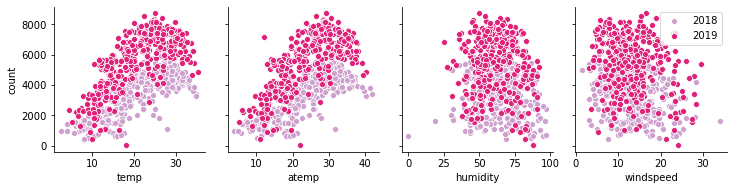

In [765]:
# Checking the impact of year against the numerical variable : 
ax = sns.pairplot(x_vars=['temp', 'atemp', 'humidity', 'windspeed'], y_vars=['count'] , data=bike, hue='year', palette='PuRd')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

<h2>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Data Preparation
        </span>    
    </font>
</h2>

<h3>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Dummy Variable Creation
            </span>   
        </font>    
</h3>


In [766]:
# Dummy Variable
months=pd.get_dummies(bike.months,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

<h3>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Merging the Dataframes
            </span>   
        </font>    
</h3>

In [767]:
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,11Nov,12Dec,1Jan,2Feb,3Mar,4Apr,5May,6Jun,7Jul,8Aug,9Sep,1Monday,2Tuesday,3Wednesday,4Thursday,5Friday,6Saturday,Light_rainsnow,Misty,Spring,Summer,Winter,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,Spring,0,1Jan,0,1Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,Spring,0,1Jan,0,2Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,Spring,0,1Jan,0,3Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Spring,0,1Jan,0,4Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,Spring,0,1Jan,0,5Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [768]:
bike.drop(['months', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)

In [769]:
bike.head()

,11Nov,12Dec,1Jan,2Feb,3Mar,4Apr,5May,6Jun,7Jul,8Aug,9Sep,1Monday,2Tuesday,3Wednesday,4Thursday,5Friday,6Saturday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [770]:
bike.shape

(730, 30)

In [771]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   11Nov           730 non-null    uint8  
 1   12Dec           730 non-null    uint8  
 2   1Jan            730 non-null    uint8  
 3   2Feb            730 non-null    uint8  
 4   3Mar            730 non-null    uint8  
 5   4Apr            730 non-null    uint8  
 6   5May            730 non-null    uint8  
 7   6Jun            730 non-null    uint8  
 8   7Jul            730 non-null    uint8  
 9   8Aug            730 non-null    uint8  
 10  9Sep            730 non-null    uint8  
 11  1Monday         730 non-null    uint8  
 12  2Tuesday        730 non-null    uint8  
 13  3Wednesday      730 non-null    uint8  
 14  4Thursday       730 non-null    uint8  
 15  5Friday         730 non-null    uint8  
 16  6Saturday       730 non-null    uint8  
 17  Light_rainsnow  730 non-null    uin

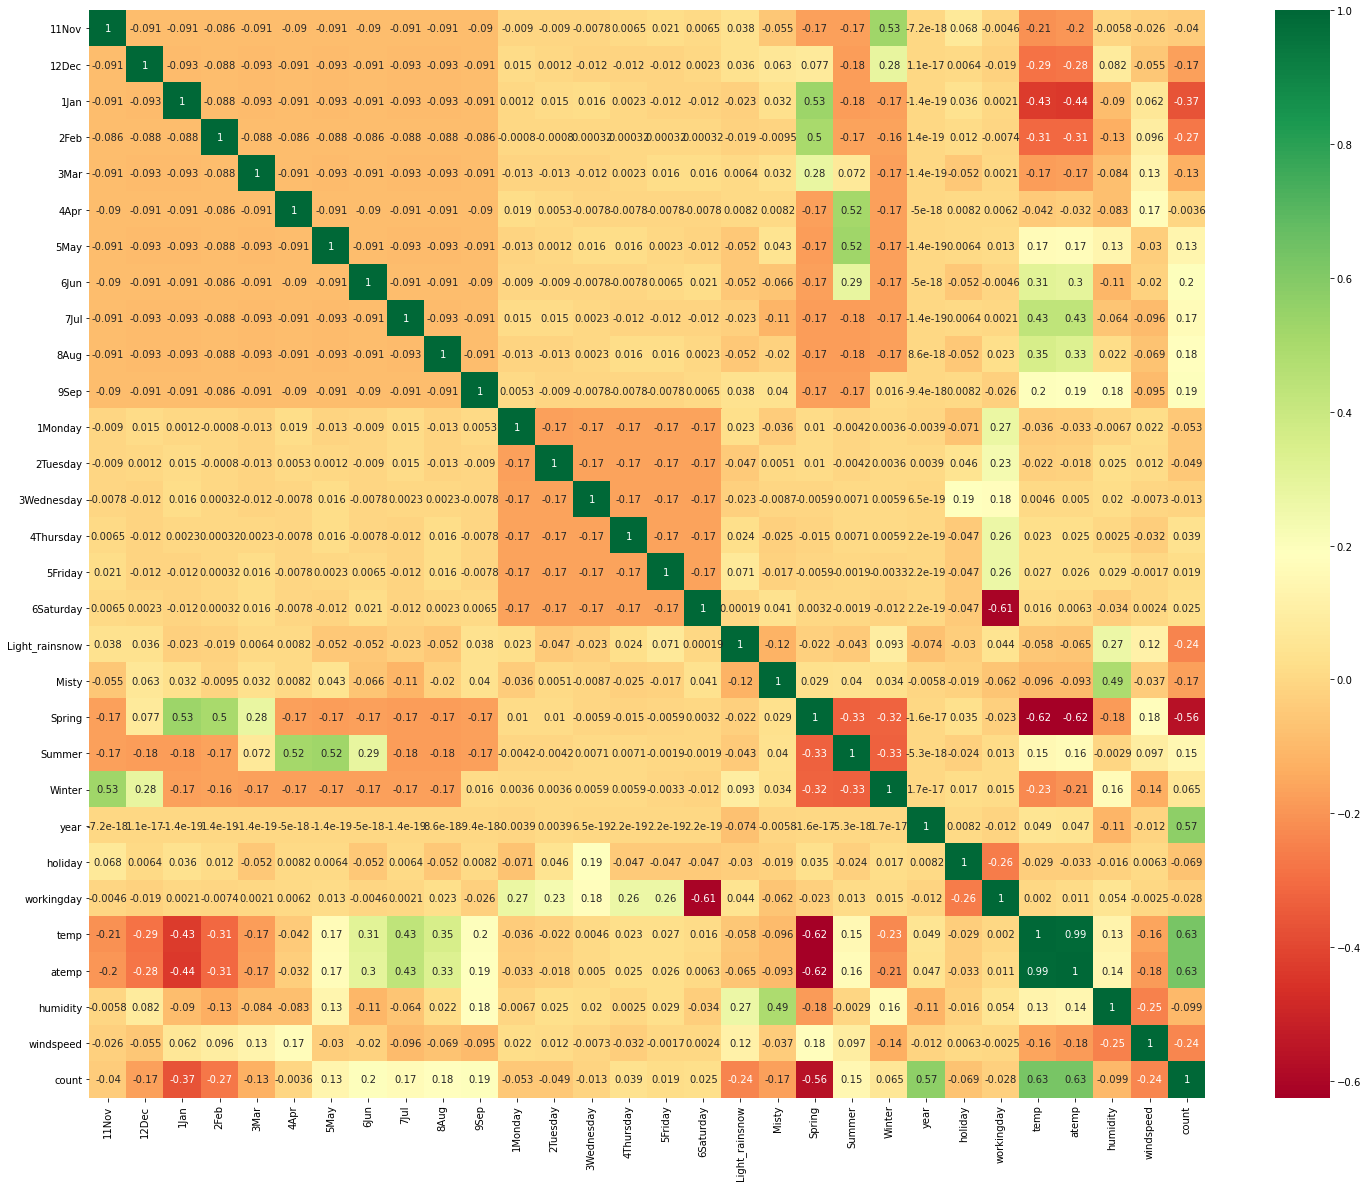

In [772]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='RdYlGn', annot = True)
plt.show()


<span style='font-family:Georgia'>
    <b>Observations:</b> 
    <p> </p>
<ul>
    <li> There is multi-colinearity between the variables. </li>
    <li> We will use either temp or atemp as there is high multicolinearity amongst the two.</li>
    <li> Spring is negatively correlated with count. </li>
    <li> emp, atemp and yr has strong correlation with count. </li>
    <li> misty weather and humidity are correlated.</li>
    <li> various months and corresponding weather are correlated.</li>            
</ul>    
</span>    
</div>

<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Splitting the data into Train & Test Dataset
        </span>    
    </font>
</h1>

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Train & Test Split
            </span>   
        </font>    
</h2>

In [773]:
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike,train_size = 0.7, random_state=100)

In [774]:
bike_train.shape

(510, 30)

In [775]:
bike_train.describe()

,11Nov,12Dec,1Jan,2Feb,3Mar,4Apr,5May,6Jun,7Jul,8Aug,9Sep,1Monday,2Tuesday,3Wednesday,4Thursday,5Friday,6Saturday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.086275,0.084314,0.088235,0.066667,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,20.108257,23.500287,63.123710,12.834912,4485.337255
std,0.281045,0.278131,0.283915,0.249689,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,7.431626,8.090963,14.153170,5.292031,1950.666077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000


In [776]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Rescalling bike_train dataframe
            </span>   
        </font>    
</h2>

In [777]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [778]:
bike_train.head()

,11Nov,12Dec,1Jan,2Feb,3Mar,4Apr,5May,6Jun,7Jul,8Aug,9Sep,1Monday,2Tuesday,3Wednesday,4Thursday,5Friday,6Saturday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,10.489153,11.5850,48.3333,23.500518,1796
482,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,15.443347,18.8752,48.9583,8.708325,4220
111,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,13.803347,16.0977,72.9583,14.707907,1683


In [779]:
# Appliyng scaler on numerical vars
num_vars = ['temp','atemp','humidity','windspeed','count']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [780]:
bike_train[num_vars].head()

,temp,atemp,humidity,windspeed,count
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [781]:
bike_train.head()

,11Nov,12Dec,1Jan,2Feb,3Mar,4Apr,5May,6Jun,7Jul,8Aug,9Sep,1Monday,2Tuesday,3Wednesday,4Thursday,5Friday,6Saturday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095


<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Building the Linear Model
        </span>    
    </font>
</h1>

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            X_train and y_train
            </span>   
        </font>    
</h2>

In [782]:
# Building the model

y_train = bike_train.pop('count')
X_train = bike_train

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            RFE
            </span>   
        </font>    
</h2>
<span style='font-family:Candra'>
    <p> Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE </p>
</span>   

In [783]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [784]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,20)
rfe =rfe.fit(X_train, y_train)

In [785]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('11Nov', True, 1),
 ('12Dec', True, 1),
 ('1Jan', True, 1),
 ('2Feb', True, 1),
 ('3Mar', False, 8),
 ('4Apr', False, 7),
 ('5May', False, 5),
 ('6Jun', False, 10),
 ('7Jul', True, 1),
 ('8Aug', False, 6),
 ('9Sep', True, 1),
 ('1Monday', False, 3),
 ('2Tuesday', False, 4),
 ('3Wednesday', False, 2),
 ('4Thursday', True, 1),
 ('5Friday', True, 1),
 ('6Saturday', False, 9),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [786]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['11Nov', '12Dec', '1Jan', '2Feb', '7Jul', '9Sep', '4Thursday',
       '5Friday', 'Light_rainsnow', 'Misty', 'Spring', 'Summer', 'Winter',
       'year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed'],
      dtype='object')

In [787]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['3Mar', '4Apr', '5May', '6Jun', '8Aug', '1Monday', '2Tuesday',
       '3Wednesday', '6Saturday'],
      dtype='object')

In [788]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Manual Model Development using statsmodel
            </span>   
        </font>    
</h2>

In [789]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe = sm.add_constant(X_train_rfe)

In [790]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [791]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
0,const,88.04
17,temp,59.47
18,atemp,54.10
11,Spring,5.80
13,Winter,3.98
12,Summer,2.94
3,1Jan,2.37
19,humidity,1.94
4,2Feb,1.86
1,11Nov,1.82


<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 1
            </span>   
        </font>    
</h3>

In [792]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.69e-186
Time:                        20:51:21   Log-Likelihood:                 520.89
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     489   BIC:                            -910.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3443      0.037      9.

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 2
            </span>   
        </font>    
</h3>

In [793]:
# M2
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,87.90
11,Spring,5.69
17,temp,4.75
13,Winter,3.85
12,Summer,2.82
3,1Jan,2.37
18,humidity,1.94
4,2Feb,1.86
1,11Nov,1.82
2,12Dec,1.67


In [794]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.98e-187
Time:                        20:51:21   Log-Likelihood:                 520.85
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     490   BIC:                            -917.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3439      0.037      9.

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 3
            </span>   
        </font>    
</h3>

In [795]:
# M3
X_train_new = X_train_lm1.drop(['2Feb'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,84.82
10,Spring,5.28
16,temp,4.44
12,Winter,3.84
11,Summer,2.77
17,humidity,1.94
1,11Nov,1.78
3,1Jan,1.68
9,Misty,1.59
2,12Dec,1.52


In [796]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.27e-187
Time:                        20:51:22   Log-Likelihood:                 519.40
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     491   BIC:                            -920.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3323      0.036      9.

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 4
            </span>   
        </font>    
</h3>

In [797]:
# M4
X_train_new = X_train_lm1.drop(['5Friday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,84.76
9,Spring,5.27
15,temp,4.43
11,Winter,3.83
10,Summer,2.77
16,humidity,1.94
1,11Nov,1.77
3,1Jan,1.68
8,Misty,1.59
2,12Dec,1.51


In [798]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.09e-188
Time:                        20:51:22   Log-Likelihood:                 517.91
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     492   BIC:                            -923.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3307      0.036      9.

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 5
            </span>   
        </font>    
</h3>

In [799]:
# M5
X_train_new = X_train_lm1.drop(['4Thursday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,84.72
8,Spring,5.27
14,temp,4.43
10,Winter,3.83
9,Summer,2.77
15,humidity,1.93
1,11Nov,1.77
3,1Jan,1.68
7,Misty,1.59
2,12Dec,1.50


In [800]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.19e-188
Time:                        20:51:22   Log-Likelihood:                 516.51
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     493   BIC:                            -927.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3321      0.036      9.

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 6
            </span>   
        </font>    
</h3>

In [801]:
# M6
X_train_new = X_train_lm1.drop(['11Nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,80.96
7,Spring,5.10
13,temp,4.15
9,Winter,3.59
8,Summer,2.69
14,humidity,1.93
2,1Jan,1.65
6,Misty,1.58
3,7Jul,1.49
4,9Sep,1.31


In [802]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          6.65e-189
Time:                        20:51:22   Log-Likelihood:                 514.40
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     494   BIC:                            -929.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3166      0.036      8.

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 7
            </span>   
        </font>    
</h3>

In [803]:
# M7
X_train_new = X_train_lm1.drop(['12Dec'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,78.83
6,Spring,5.08
12,temp,3.89
8,Winter,3.59
7,Summer,2.65
13,humidity,1.91
5,Misty,1.58
1,1Jan,1.57
2,7Jul,1.49
3,9Sep,1.30


In [804]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.31e-189
Time:                        20:51:22   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3083      0.035      8.

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 8
            </span>   
        </font>    
</h3>

In [805]:
# M8
X_train_new = X_train_lm1.drop(['1Jan'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,76.46
5,Spring,5.02
11,temp,3.62
7,Winter,3.48
6,Summer,2.62
12,humidity,1.90
4,Misty,1.58
1,7Jul,1.48
2,9Sep,1.30
3,Light_rainsnow,1.24


In [806]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.30e-190
Time:                        20:51:22   Log-Likelihood:                 511.50
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     496   BIC:                            -935.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2967      0.035      8.

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 9
            </span>   
        </font>    
</h3>

In [807]:
# M9
X_train_new = X_train_lm1.drop(['Spring'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,46.86
11,humidity,1.88
10,temp,1.60
4,Misty,1.56
1,7Jul,1.43
5,Summer,1.33
6,Winter,1.29
3,Light_rainsnow,1.24
2,9Sep,1.19
12,windspeed,1.18


In [808]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.42e-189
Time:                        20:51:22   Log-Likelihood:                 507.68
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2374      0.027      8.

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Final model
            </span>   
        </font>    
</h3>

In [809]:
# M10
X_train_new = X_train_lm1.drop(['workingday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new) 

,Features,VIF
0,const,44.97
10,humidity,1.87
9,temp,1.60
4,Misty,1.55
1,7Jul,1.43
5,Summer,1.33
6,Winter,1.29
3,Light_rainsnow,1.24
2,9Sep,1.19
11,windspeed,1.18


In [810]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          6.89e-190
Time:                        20:51:22   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2262      0.027      8.


<span style='font-family:Georgia'>
    <b>Observations:</b> The model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, this is the final model (unless the test data metrics are not significantly close to this number).
</span>    
</div>

In [811]:
# Checking the parameters obtained
lr1.params

const             0.226223
7Jul             -0.047814
9Sep              0.096174
Light_rainsnow   -0.231830
Misty            -0.050192
Summer            0.081529
Winter            0.134695
year              0.227954
holiday          -0.098909
temp              0.597749
humidity         -0.184135
windspeed        -0.189481
dtype: float64

<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Final Model Interpretation
        </span>    
    </font>
</h1>

<h2> 
    <font color = Darkblue>
        <span style='font-family:Candra'>
    Hypothesis Testing 
                 </font>
</h2>



<p> Hypothesis Testing States that<br>
    <blockquote>
        H0:B1=B2=...=Bn=0 <br>
        H1: at least one  Bi!=0
    </blockquote><br>

In [812]:
lr1.params

const             0.226223
7Jul             -0.047814
9Sep              0.096174
Light_rainsnow   -0.231830
Misty            -0.050192
Summer            0.081529
Winter            0.134695
year              0.227954
holiday          -0.098909
temp              0.597749
humidity         -0.184135
windspeed        -0.189481
dtype: float64

From the lr1 model summary, it is evident that all our coefficients are not equal to zero, which means we **REJECT the NULL HYPOTHESIS**


<h2> 
    <span style='font-family:Candra'>
    <font color = Darkblue>
    F-Staitsics
        </font>
        </span>
    
</h2>
    <p> F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.</p>
    <blockquote>
        F-Statistics :       237.0 <br>
        Prob (F-statistic):  6.89e-190
    </blockquote>   
    


<span style='font-family:Candra'>
    <b>Observation:</b> The F-Statistics value of 237 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant
</span>    
</div>


<h2>
    <span style='font-family:Candra'>
        <font color = Darkblue>
    The equation of best fitted model 
        </font>
            </span> 
        </h2>




<p style="font-size:20px">
    <span style='font-family:Candra'>
count=0.226223 - (0.047814 x 7Jul) + (0.096174 x 9Sep) - (0.231830 x Light_rainsnow) − (0.050192 x Misty) + (0.081529 x Summer) + (0.134695 x Winter) + (0.227954 x year) - (0.098909 x holiday) + (0.597749 x temp) − (0.184135 x humidity) - (0.189481 x windspeed)

</span>
    </p>
</div>


<h3> 
    <span style='font-family:Candra'>
    <font color = Darkblue>
    Interpretation of coefficients
</font>
</span>
    </h3>

<p>  </p>
    
<ul>
<li><b>const</b> : The Constant value of ‘0.226223’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.226223 units </li><hr>

 <li><b>7Jul</b> : A coefficient value of ‘-0.047814’ indicated that a unit increase in 7Jul variable, decrease the bike hire numbers by 0.047814 units </li><hr> 

 <li><b>9Sep</b> : A coefficient value of ‘0.096174’ indicated that, a unit increase in 9Sep variable increases the bike hire numbers by 0.096174 units </li><hr> 

 <li><b>Light_rainsnow</b> : A coefficient value of ‘-0.231830’ indicated that a unit increase in Light_rainsnow variable, decreases the bike hire numbers by 0.231830 units </li><hr> 

 <li><b>Misty</b> : A coefficient value of ‘-0.050192’ indicated that, a unit increase in Misty variable decreases the bike hire numbers by 0.050192 units </li><hr> 

 <li><b>Summer</b> : A coefficient value of ‘0.081529’ indicated that a unit increase in Summer variable increase the bike hire numbers by 0.081529 units </li><hr> 

 <li><b>Winter</b> : A coefficient value of ‘0.134695’ indicated that a unit increase in Winter variable increases the bike hire numbers by 0.134695 units</li><hr> 

 <li><b>year</b> : A coefficient value of ‘0.227954’ indicated that a unit increase in year variable increases the bike hire numbers by 0.227954 units </li><hr> 

 <li><b>holiday</b> : A coefficient value of ‘-0.098909’ indicated that, a unit increase in holiday variable, decreases the bike hire numbers by 0.098909 units </li><hr> 

 <li><b>temp</b> : A coefficient value of ‘0.597749’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.597749 units </li><hr> 

 <li><b>humidity</b> : A coefficient value of ‘-0.184135’ indicated that a unit increase in humidity variable decreases the bike hire numbers by 0.184135 units </li><hr> 

<li><b>windspeed</b> : A coefficient value of ‘-0.189481’ indicated that a unit increase in windspeed variable decreases the bike hire numbers by 0.189481 units </li><hr>
</ul>
</span>

<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Model Validation
        </span>    
    </font>
</h1>
<span style='font-family:Candra'>
    <p> Validating the assumption of Linear Regression Model : </p>
        <ul>
            <li> Linear Relationship </li>
            <li> Homoscedasticity </li>
            <li> Absence of Multicollinearity </li>
            <li> Independence of residuals </li>
            <li> Normality of Errors</li>
        </ul>
    
</span>

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Linear Relationship
            </span>   
        </font>    
</h2>

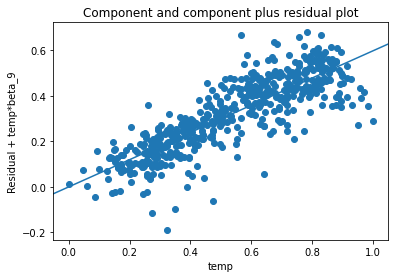

In [813]:
sm.graphics.plot_ccpr(lr1, 'temp')
plt.show()

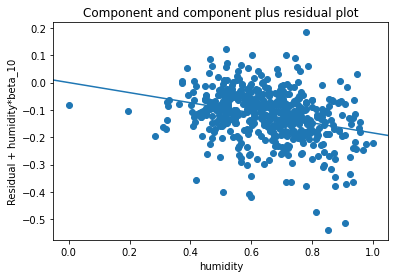

In [814]:
sm.graphics.plot_ccpr(lr1, 'humidity')
plt.show()

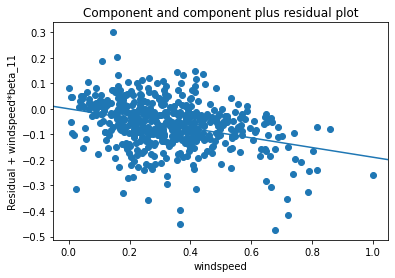

In [815]:
sm.graphics.plot_ccpr(lr1, 'windspeed')
plt.show()

<span style='font-family:Candra'>
<b>Observation:</b> The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved
</span>    
</div>

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Homoscedasticity
            </span>   
        </font>    
</h2>

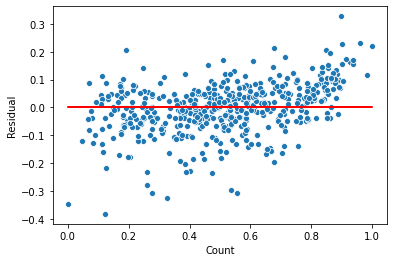

In [816]:
y_train_pred = lr1.predict(X_train_lm1)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()


<span style='font-family:Candra'>
<b>Observation:</b> There is no visible pattern in residual values, thus homoscedacity is well preserved
</span>    
</div>

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Absence of Multicolinearity
            </span>   
        </font>    
</h2>

In [817]:
X_train_new.columns

Index(['const', '7Jul', '9Sep', 'Light_rainsnow', 'Misty', 'Summer', 'Winter',
       'year', 'holiday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

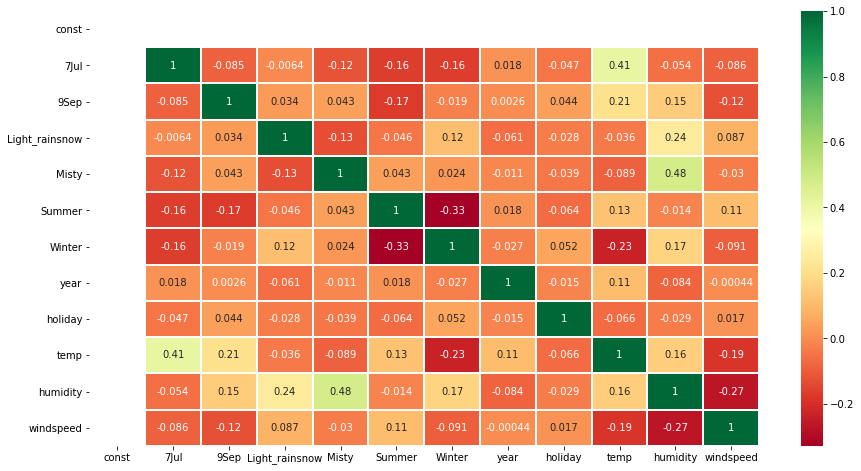

In [818]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [819]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
0,const,44.97
10,humidity,1.87
9,temp,1.60
4,Misty,1.55
1,7Jul,1.43
5,Summer,1.33
6,Winter,1.29
3,Light_rainsnow,1.24
2,9Sep,1.19
11,windspeed,1.18



<span style='font-family:Candra'>
<b>Observation:</b> All the predictor variables have VIF value less than 5. There is insignificant multicolinearity among the predictor variables.
</span>    
</div>

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Independence of residuals
            </span>   
        </font>    
</h2>


In [834]:
print('The Durbin-Watson value for Final Model is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))


The Durbin-Watson value for Final Model is 2.0689


<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
           Normality of error
            </span>   
        </font>    
</h2>



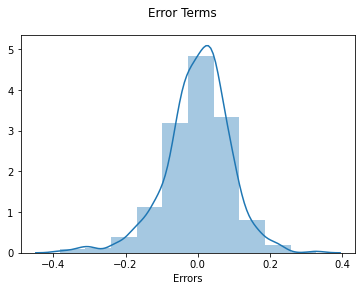

In [821]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 10)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()


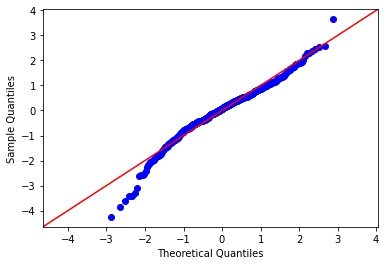

In [822]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()


<span style='font-family:Candra'>
<b>Observation:</b> Based on the histogram, the errors are normally distributed.
</span>    
</div>

<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Making Predictions using final model
        </span>    
    </font>
</h1>

<h2>   
      <font color = Darkblue >
          <span style='font-family:Candra'>
            Scaling bike_test dataframe 
              </span> 
        </font>    
</h2>
<p>Apply scaler.transform() to all numeric variables in test dataset.
</p>
 

In [823]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test[num_vars].head()

,temp,atemp,humidity,windspeed,count
184,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.817246,0.741471,0.314298,0.537414,0.569029


In [824]:
bike_test.describe()

,11Nov,12Dec,1Jan,2Feb,3Mar,4Apr,5May,6Jun,7Jul,8Aug,9Sep,1Monday,2Tuesday,3Wednesday,4Thursday,5Friday,6Saturday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.072727,0.086364,0.077273,0.100000,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.260281,0.281541,0.267633,0.300684,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300



<h2>   
      <font color = Darkblue >
          <span style='font-family:Candra'>
            Dividing X_test and y_test 
              </span> 
        </font>  
          
</h2>


In [825]:
y_test = bike_test.pop('count')
X_test = bike_test

In [826]:
X_train_lm1 = X_train_lm1.drop(['const'], axis = 1)

In [827]:
col1=X_train_lm1.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm1 = sm.add_constant(X_test)

X_test_lm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   7Jul            220 non-null    uint8  
 2   9Sep            220 non-null    uint8  
 3   Light_rainsnow  220 non-null    uint8  
 4   Misty           220 non-null    uint8  
 5   Summer          220 non-null    uint8  
 6   Winter          220 non-null    uint8  
 7   year            220 non-null    int64  
 8   holiday         220 non-null    int64  
 9   temp            220 non-null    float64
 10  humidity        220 non-null    float64
 11  windspeed       220 non-null    float64
dtypes: float64(4), int64(2), uint8(6)
memory usage: 13.3 KB


In [828]:
y_pred = lr1.predict(X_test_lm1)

<h2>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Model Evaluation
        </span>    
    </font>
</h2>

Text(0, 0.5, 'y_pred')

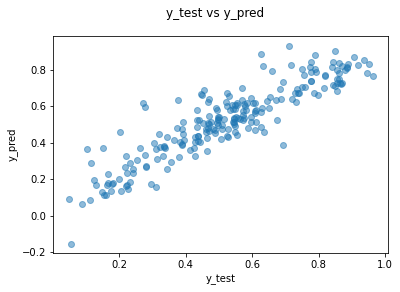

In [829]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')


<h3>   
      <font color = Darkblue >
          <span style='font-family:Candra'>
          R<sup>2</sup> Value Calculation for bike_test dataframe           
        </font>    
</h3>
</span>

In [830]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred),4)
r2

0.805


<h3>   
<span style='font-family:Candra'>
    <font color = Darkblue >
          Adjusted R<sup>2</sup> Value Calculation for bike_test dataframe           
        </font>    
</h3>
<br>

</span>
<span style="font-size:18" >
    <span style ='font-family:Candra'>
        <font color = blue > 
      <math> R<sup>2</sup><sub>adj</sub>=1−</math>
        <span style="display: inline-block;vertical-align: middle;">
    <div style="text-align: center;border-bottom: 1px solid black;">(1-R<sup>2</sup>) x (n-1)</div>
     <div style="text-align: center;">(n-p-1)</div> 
        </span>
        </font>
</span>
</span>

In [831]:

# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7947

<span style='font-family:Candra'>
<h4>  <span style='font-family:Candra'> 
      <font color = Darkblue >
            Model Train & Test R2 Statsitics Comparison           
        </font>    
</h4>
<table>
    <thead>
    <tr><th>Measurement</th><th>Train Dataset</th><th>Test Dataset</th></tr>
    </thead>
    <tbody>
        <tr><td>R2 Value</td><td>84.0%</td><td>83.6%</td></tr>
        <tr><td>Adjusted R2 Value</td><td>80.5%</td><td>79.4%</td></tr>
    </tbody>
</table>
    <p> It seems to be really a good model that can generalize various datasets. </p>
</span>


<h3> 
    <span style='font-family:Candra'>
      <font color = Darkblue >
          Calculating RMSE for the selected Model          
        </font>    
</h3>
</span>

In [832]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0966


<h3>   
    <span style='font-family:Candra'>  
    <font color = Darkblue >
          Calculating RMSE for the selected Model          
        </font>    
</h3>
</span>

In [833]:
from sklearn.metrics import mean_absolute_error
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0719


<h1>   
    <span style='font-family:Candra'>  
    <font color = Darkblue >
          Business Analysis       
        </font>    
    </h1>
</span>


<h2>   
    <span style='font-family:Candra'>  
    <font color = Darkblue >
          Analysis from the model      
        </font>   
        </span>
    </h2>


<span style='font-family:Candra'>
<p><b>As per the final model, high influencing variables on bike booking are: </b></p>
        <br>
<li><b>Temperature (Temp)</b><br> From the model, it can be concluded that Temperature plays a significant role in increasing bike bookings. Customers prefer to ride bikes in warmer temperatures. </li>

<li><b>Year</b><br>A growing customerbase can be observed, post covid-19 in coming years.</li>
<li><b> Summers and Winters </b><br>Customers rent bikes in these two months the most, hence, high units of bikes must be available with better deals.</li>

<li><b> Light_rainsnow </b><br>Customers avoided renting bikes in showy climate. Note: No data was available for heavy snow weather.</li>

        
<hr>
    


<h2>   
    <span style='font-family:Candra'>  
    <font color = Darkblue >
          Recommendations to increase sales:     
        </font>   
        </span>
    </h2>
    
    
    
 <span style='font-family:Candra'>
<p><b>By considering these recommendations, the sales of BoomBike shall surely rise post and during Covid-19: </b></p>
        <br>
<li><b>Regular Sanitisation of Bikes</b><br> This shall develop trust amongst the customers and shall broaden the customerbase.</li><br>

<li><b>Providing discounts and better deals</b><br>During summers and winters, BoomBike should offer deals and discounts to attaract more customers.</li><br>
    
<li><b> Providing optional bike accessories for the ride </b><br>Incentivising customers shall attact more customers.</li><br>
    
<li><b> Tie-ups with Insurance companies </b><br>Tie-ups with insurance companies for micro-insurances shall portray care for customers</li><br>

<li><b> Rain Covers and Umbrellas </b><br>Detachable rain covers or umbrellas can be installed, this shall increase sales in the rainy seasons due to higher utility. This technique shall induce more people to try due to its uniqueness and flexibility.</li><br>